# Laboratory work 8: boundary-value problem

---

## Work objective:

Solve a boundary-value problem by:

1) shooting method;
2) tridiagonal matrix method.

---

## Shooting method

The example to which this method was applied is an equation describing motion of a particle in
Toda's potential.

\begin{equation*}
    \ddot{x} = 1 - e^x
\end{equation*}

Let's figure out the form of the potential function:

\begin{equation*}
    \ddot{x} = -\frac{1}{m}\frac{dU}{dx} \implies
    \frac{1}{m}\frac{dU}{dx} = e^x - 1
\end{equation*}

If we say that $m = 1$ and omit an arbitrary constant, then:

\begin{equation*}
    U(x) = e^x - x
\end{equation*}

Boundary conditions are:

\begin{equation*}
    x(0) = x(120) = 0,\ \dot{x}(0) = \dot{x}(120) = A,\ A \geq 10
\end{equation*}

We shall find all periodic solutions to this problem.

### Preliminary steps

We have to transform the equation of the 2nd order into a system of equations of the 1st order to be able to apply aforementioned method. It may be done the following way:

\begin{cases}
    \dot{y} = 1 - e^z \\
    \dot{z} = y
\end{cases}

\begin{cases}
    y(0) = y(120) = A \\
    z(0) = z(120) = 0
\end{cases}

The idea of the method is to solve given system of ODE's as an initial-value problem with initial
values $y(0) = A$, $z(0) = 0$ and then vary parameter $A$ to satisfy right border condition
$y(120) = A$, $z(120) = 0$.

---

## Tridiagonal-matrix method

The example to which this method was applied is the following equation:

\begin{equation*}
    y'' - P(x)^2 y = f(x),\ y(0) = y(1),\ P(x)^2\text{ and }f(x)\text{ are periodic}
\end{equation*}

Used difference scheme:

\begin{cases}
    \dfrac{y_1 - 2y_0 + y_{N - 1}}{h^2} - P(0)^2 y_0 = f(0) \\
    \dfrac{y_{n + 1} - 2y_n + y_{n - 1}}{h^2} - P(nh)^2 y_n = f(nh) \\
    \dfrac{y_0 -2y_{N - 1} + y_{N + 2}}{h^2} - P(1 - h)^2 y_{N - 1} = f(1 - h)
\end{cases}

where $Nh = 1$, $n \in \{1, 2, ..., N - 2\}$.

Firstly, let's analyze the following equation:

\begin{equation*}
    y'' + p(x)y' + q(x)y = f(x),\ y(0) = y(1),\ y(x)\text{ is periodic}
\end{equation*}

Corresponding difference scheme:

\begin{equation*}
    \frac{y_{n + 1} - 2y_n + y_{n - 1}}{h^2} + p_n \frac{y_{n + 1} - y_{n - 1}}{2h} + q_n y_n = f_n,\
    n \in \{0, ..., N - 1\}
\end{equation*}

Equivalent form:

\begin{equation*}
    \left(1 + \frac{hp_n}{2}\right)y_{n + 1} + (h^2q_n - 2)y_n +
    \left(1 - \frac{hp_n}{2}\right)y_{n - 1} = h^2 f_n
\end{equation*}

Because $y(x)$ is a periodical function, $y_N = y_0$. If we assume existence of hypothetical
$y_{-1}$, then $y_{-1} = y_{N - 1}$. Thus, we've got a system:

\begin{cases}
    \left(1 + \frac{hp_0}{2}\right)y_1 + (h^2q_0 - 2)y_0 +
    \left(1 - \frac{hp_0}{2}\right)y_{N - 1} = h^2 f_0 \\

    \left(1 + \frac{hp_n}{2}\right)y_{n + 1} + (h^2q_n - 2)y_n +
    \left(1 - \frac{hp_n}{2}\right)y_{n - 1} = h^2 f_n,\ n \in \{1, ..., N - 2\} \\

    \left(1 + \frac{hp_{N - 1}}{2}\right)y_{0} + (h^2q_{N - 1} - 2)y_{N - 1} +
    \left(1 - \frac{hp_{N - 1}}{2}\right)y_{N - 2} = h^2 f_{N - 1}
\end{cases}

For purposes of brevity, let's introduce some notions:

\begin{equation*}
    a_n = 1 + \frac{hp_n}{2},\ \ b_n = h^2q_n - 2,\ \ c_n = 1 - \frac{hp_n}{2},\ \ d_n = h^2 f_n,\ \
    n \in \{0, ..., N - 1\}
\end{equation*}

Not we rewrite the system using matrices:

\begin{equation*}
    \begin{pmatrix}
           b_0    & a_0 &  0  & ... &     0     &     0     &    c_0    \\
           c_1    & b_1 & a_1 & ... &     0     &     0     &     0     \\
           ...    & ... & ... & ... &    ...    &    ...    &    ...    \\
            0     &  0  &  0  & ... & c_{N - 2} & b_{N - 2} & a_{N - 2} \\
        a_{N - 1} &  0  &  0  & ... &     0     & c_{N - 1} & b_{N - 1}
    \end{pmatrix}
    \begin{pmatrix}
        y_0 \\
        y_1 \\
        ... \\
        y_{N - 2} \\
        y_{N - 1} \\
    \end{pmatrix} =
    \begin{pmatrix}
        d_0 \\
        d_1 \\
        ... \\
        d_{N - 2} \\
        d_{N - 1} \\
    \end{pmatrix}
\end{equation*}

Now we are going to find a way so solve such a system. First of all, let's denote:

\begin{equation*}
    y_{n - 1} = \alpha_n + \beta_n y_n + \gamma_n y_{N - 1},\ n \in \{1, ..., N - 2\}
\end{equation*}

\begin{equation*}
    y_{N - 2} = \alpha_{N - 1} + \gamma_{N - 1} y_{N - 1}
\end{equation*}

Coefficients $\alpha_1$, $\beta_1$ and $\gamma_1$ are easy to find:

\begin{equation*}
    \begin{cases}
        y_0 = \alpha_1 + \beta_1 y_1 + \gamma_1 y_{N - 1} \\
        b_0 y_0 + a_0 y_1 + c_0 y_{N - 1} = d_0
    \end{cases}
    \implies
    \alpha_1 = \frac{d_0}{b_0},\ \beta_1 = -\frac{a_0}{b_0},\ \gamma_1 = -\frac{c_0}{b_0}
\end{equation*}

Let's find other coefficients as well:

\begin{equation*}
    a_n y_{n + 1} + b_n y_n + c_n y_{n - 1} = d_n,\ n \in \{1, ..., N - 2\}
\end{equation*}

\begin{equation*}
    a_n y_{n + 1} + b_n y_n + c_n (\alpha_n + \beta_n y_n + \gamma_n y_{N - 1}) = d_n
\end{equation*}

\begin{equation*}
    (b_n + c_n \beta_n) y_n = (d_n - c_n \alpha_n) - a_n y_{n + 1} - c_n \gamma_n y_{N - 1}
\end{equation*}

\begin{equation*}
    y_n = \frac{d_n - c_n \alpha_n}{b_n + c_n \beta_n} - \frac{a_n}{b_n + c_n \beta_n} y_{n + 1}
          - \frac{c_n \gamma_n}{b_n + c_n \beta_n} y_{N - 1}
\end{equation*}

\begin{equation*}
    y_{n - 1} = \frac{d_{n - 1} - c_{n - 1} \alpha_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}}
                - \frac{a_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}} y_n
                - \frac{c_{n - 1} \gamma_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}} y_{N - 1},\
    n \in \{2, ..., N - 1\}
\end{equation*}

\begin{equation*}
    \boxed{\alpha_n = \frac{d_{n - 1} - c_{n - 1} \alpha_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}}}\
    \boxed{\beta_n = -\frac{a_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}}}\
    \boxed{\gamma_n = -\frac{c_{n - 1} \gamma_{n - 1}}{b_{n - 1} + c_{n - 1} \beta_{n - 1}}},\
    n \in \{2, ..., N - 2\}
\end{equation*}

\begin{equation*}
    \boxed{\alpha_{N - 1} = \frac{d_{N - 2} - c_{N - 2} \alpha_{N - 2}}{b_{N - 2} + c_{N - 2} \beta_{N - 2}}}\
    \boxed{\gamma_{N - 1} = -\frac{c_{N - 2} \gamma_{N - 2}}{b_{N - 2} + c_{N - 2} \beta_{N - 2}}}
\end{equation*}

Then, we denote:

\begin{equation*}
    y_n = \nu_n + \mu_n y_0,\ n \in \{1, ..., N - 1\}
\end{equation*}

Let's find these coefficients:

$n \in \{1, ..., N - 3\}$:

\begin{equation*}
    y_{n - 1} = \alpha_n + \beta_n y_n + \gamma_n y_{N - 1},\ n \in \{2, ..., N - 2\}
\end{equation*}

\begin{equation*}
    y_{n - 1} = \alpha_n + \beta_n(\nu_n + \mu_n y_0) + \gamma_n(\nu_{N - 1} + \mu_{N - 1} y_0)
\end{equation*}

\begin{equation*}
    y_{n - 1} = (\alpha_n + \beta_n \nu_n + \gamma_n \nu_{N - 1}) + (\gamma_n \mu_{N - 1} + \beta_n \mu_n) y_0
\end{equation*}

\begin{equation*}
    y_n = (\alpha_{n + 1} + \beta_{n + 1} \nu_{n + 1} + \gamma_{n + 1} \nu_{N - 1})
           + (\gamma_{n + 1} \mu_{N - 1} + \beta_{n + 1} \mu_{n + 1}) y_0,\
    n \in \{1, ..., N - 3\}
\end{equation*}

\begin{equation*}
    \boxed{\nu_n = \alpha_{n + 1} + \beta_{n + 1} \nu_{n + 1} + \gamma_{n + 1} \nu_{N - 1}}\
    \boxed{\mu_n = \gamma_{n + 1} \mu_{N - 1} + \beta_{n + 1} \mu_{n + 1}},\
    n \in \{1, ..., N - 3\}
\end{equation*}

$n = N - 2$:

\begin{equation*}
    y_{N - 2} = \alpha_{N - 1} + \gamma_{N - 1} y_{N - 1}
\end{equation*}

\begin{equation*}
    y_{N - 2} = \alpha_{N - 1} + \gamma_{N - 1}(\nu_{N - 1} + \mu_{N - 1}y_0)
\end{equation*}

\begin{equation*}
    y_{N - 2} = (\alpha_{N - 1} + \gamma_{N - 1}\nu_{N - 1}) + \gamma_{N - 1}\mu_{N - 1}y_0
\end{equation*}

\begin{equation*}
    \boxed{\nu_{N - 2} = \alpha_{N - 1} + \gamma_{N - 1}\nu_{N - 1}}\
    \boxed{\mu_{N - 2} = \gamma_{N - 1}\mu_{N - 1}}
\end{equation*}

$n = N - 1$:

\begin{equation*}
    a_{N - 1}y_0 + b_{N - 1}y_{N - 1} + c_{N - 1} y_{N - 2} = d_{N - 1}
\end{equation*}

\begin{equation*}
    a_{N - 1}y_0 + b_{N - 1}y_{N - 1} + c_{N - 1}(\alpha_{N - 1} + \gamma_{N - 1} y_{N - 1}) = d_{N - 1}
\end{equation*}

\begin{equation*}
    (b_{N - 1} + c_{N - 1}\gamma_{N - 1}) y_{N - 1} = (d_{N - 1} - c_{N - 1}\alpha_{N - 1}) - a_{N - 1}y_0
\end{equation*}

\begin{equation*}
    \boxed{\nu_{N - 1} = \frac{d_{N - 1} - c_{N - 1}\alpha_{N - 1}}{b_{N - 1} + c_{N - 1}\gamma_{N - 1}}}\
    \boxed{\mu_{N - 1} = -\frac{a_{N - 1}}{b_{N - 1} + c_{N - 1}\gamma_{N - 1}}}
\end{equation*}

After all, we've found a way to express $y_n$, $n \in \{1, ..., N - 1\}$ through $y_0$.

Our initial problem is characterized by the fact that
$\forall n \in \{0, ..., N\} \hookrightarrow p_n = 0$.

## Imports and stuff

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) # shut fsolve up for good

## Common function for drawing plots

In [8]:
def draw(t, x, a):

    plt.figure(figsize = (21, 9), dpi = 100)
    plt.title(f"Solution for A = {a:.2f}", fontsize = 30)

    plt.xlabel("t", fontsize = 24)
    plt.xticks(fontsize =  20, ha = "center", va = "top")

    plt.ylabel("x(t)", fontsize = 24)
    plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

    plt.scatter(t, x, s = 5, color = "black")
    plt.plot(t, x, linewidth = 1, color = "black")

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

## Given boundary-value problem

In [9]:
t_1 = 0
t_2 = 120
x_1 = lambda A: np.array([A[0], 0]) # in general A is np.array so we should take the first element
x_2 = x_1
F = lambda t, x: np.array([1 - np.exp(x[1]), x[0]])

## Shooting method

### Solver for intermediate initial-value problem (taken from lab-6)

In [10]:
"""
dx/dt = f(t, x), t in [t_1; t_2], x in R^n
x(t_1) = x_0
-------
N:       number of intervals [t_1; t_2] is divided into
A, B, C: parts of Butcher tableau;
"""
def Explicit_Runge_Kutta(f, x_0, t_1, t_2, N, A, B, C, n_steps):

    order = len(B)
    if order != len(C):
        raise RuntimeError("The size of B-part of Butcher tableau mismatches the size of C-part")
    elif C[0] != 0:
        raise RuntimeError("The first element of C shall equal to 0")
    elif n_steps > N:
        raise RuntimeError("The number of steps has to be not greater than the number of intervals")

    t = np.linspace(t_1, t_2, num = N + 1, endpoint = True)
    dt = (t_2 - t_1) / N

    dim = len(x_0)
    x = np.empty(shape=(n_steps + 1, dim))
    x[0] = x_0

    k = np.empty(shape=(order, dim))

    for n in range(n_steps):
        for i in range(order):
            k[i] = f(t[n] + dt * C[i], x[n] + dt * sum(A[i - 1][j] * k[j] for j in range(i)))
        x[n + 1] = x[n] + sum(B[j] * k[j] for j in range(order)) * dt

    if n_steps < N:
        t = np.resize(t, n_steps)

    return t, x

RK_A = [[0.5],
        [0.0, 0.5],
        [0.0, 0.0, 1.0]]
RK_B = np.array([1.0/6.0, 2.0/6.0, 2.0/6.0, 1.0/6.0])
RK_C = np.array([0.0, 0.5, 0.5, 1.0])

def solve_cauchy(F, x_1, t_1, t_2, N):
    return Explicit_Runge_Kutta(F, x_1, t_1, t_2, N, RK_A, RK_B, RK_C, N)

### Shooting method itself

In [11]:
# difference between the right border condition and initial-value solution on the right border
def shooting_delta(F, solver, t_1, x_1, t_2, x_2, N):

    _, x = solver(F, x_1, t_1, t_2, N)

    return np.linalg.norm(x[x.shape[0] - 1] - np.array(x_2), ord=2)

def shooting_method(F, solver, t_1, x_1, t_2, x_2, N, initial_approx):

    G = lambda A : shooting_delta(F, solver, t_1, x_1(A), t_2, x_2(A), N)
    A = fsolve(G, initial_approx)
    t, x = solver(F, x_1(A), t_1, t_2, N)

    return t, x, A

### Results

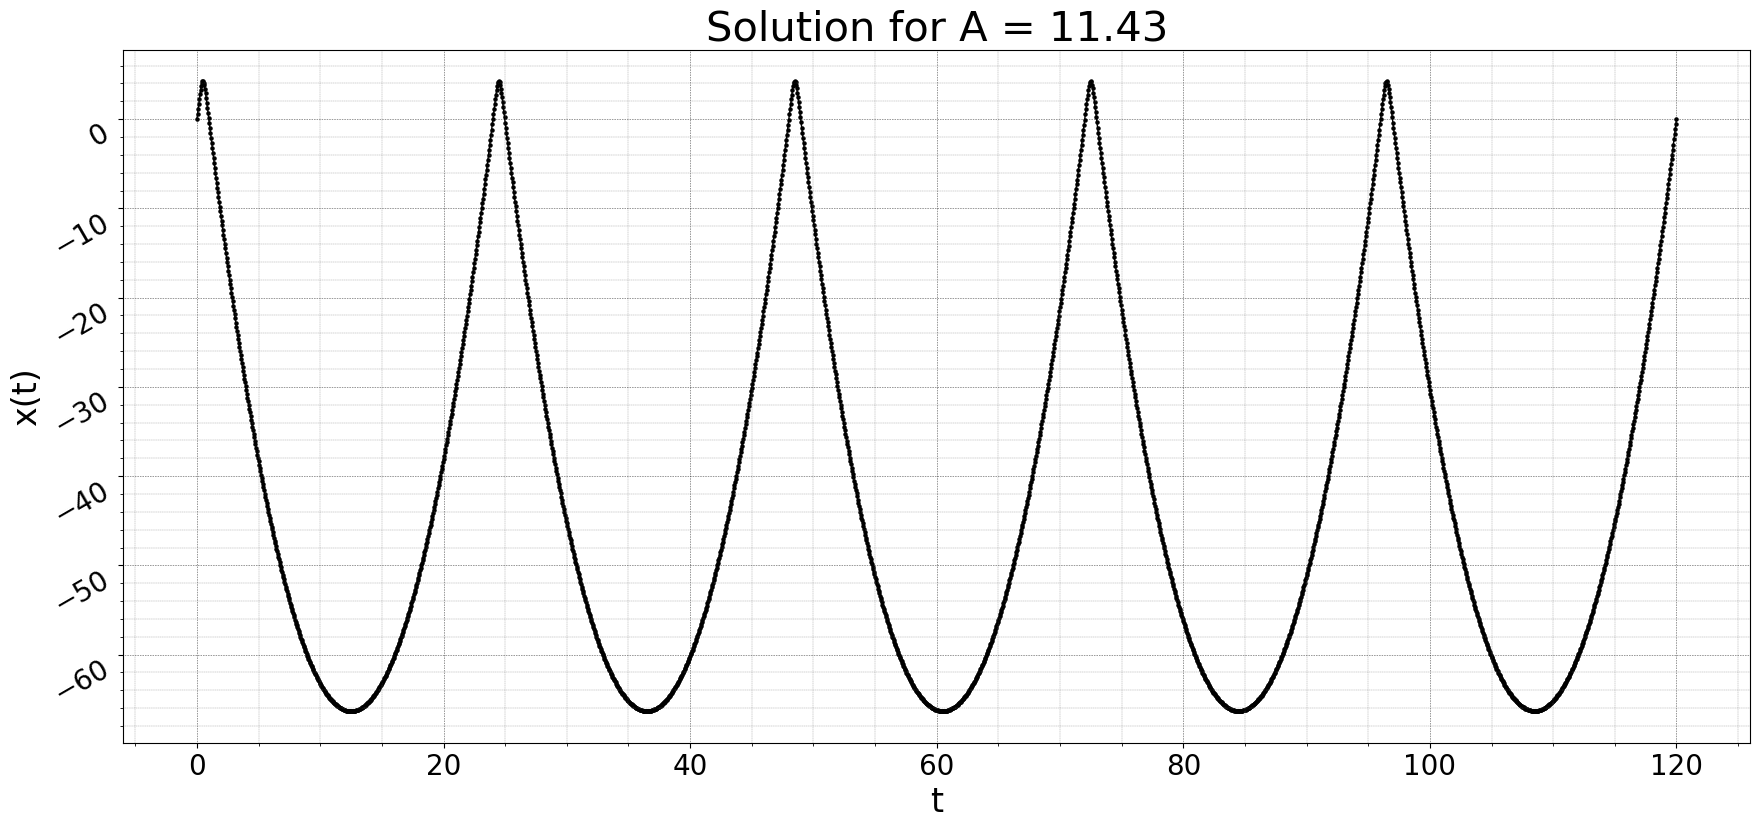

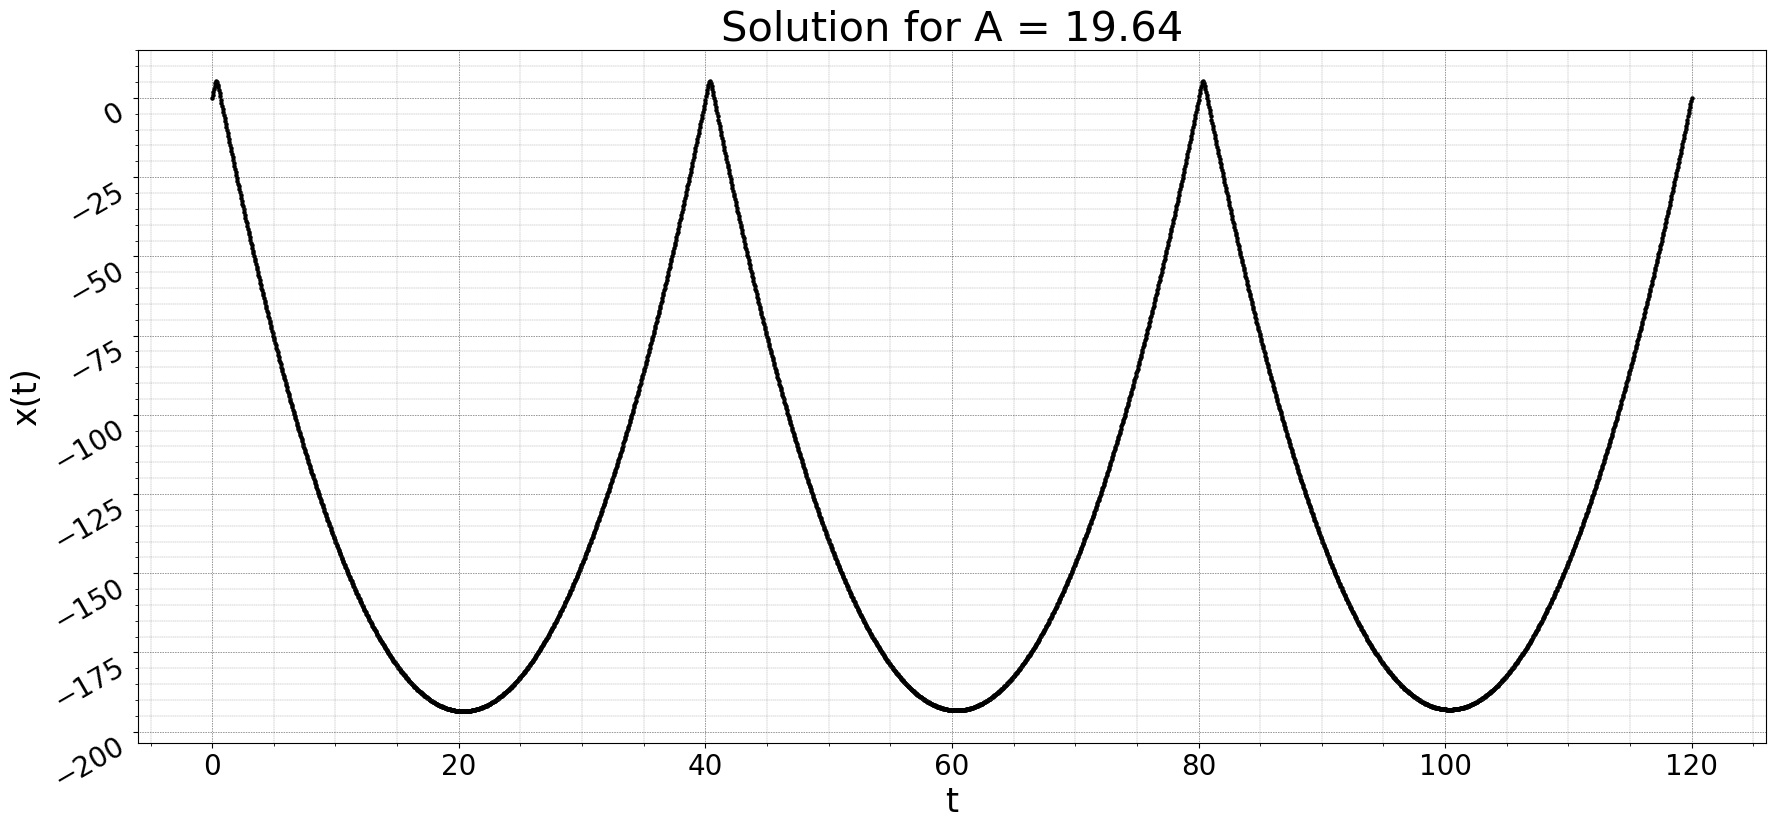

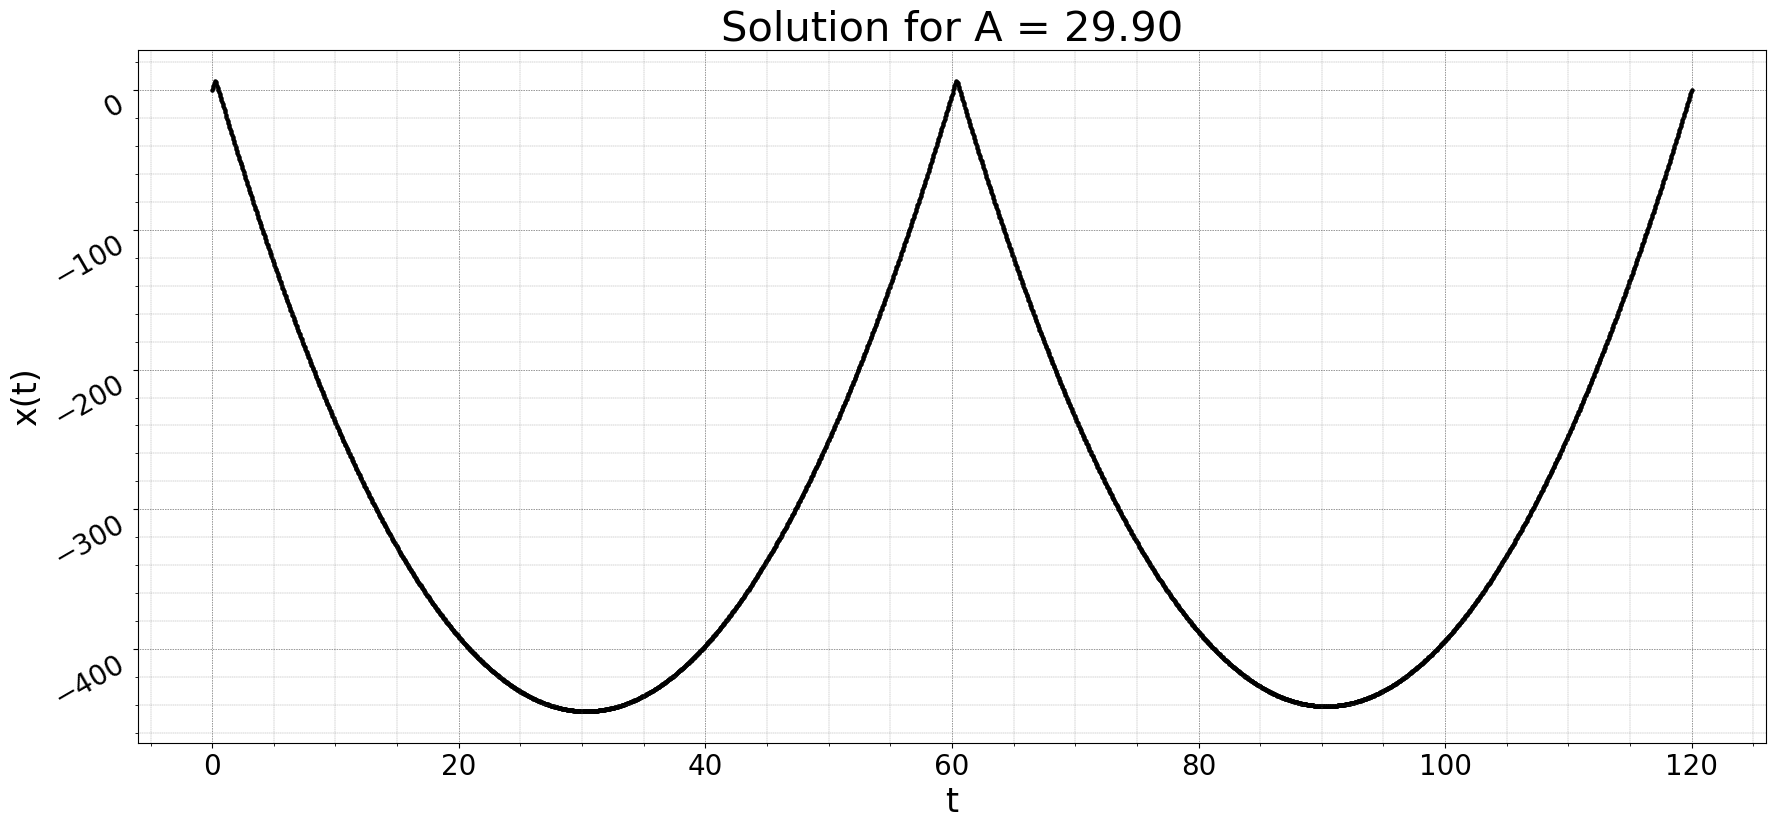

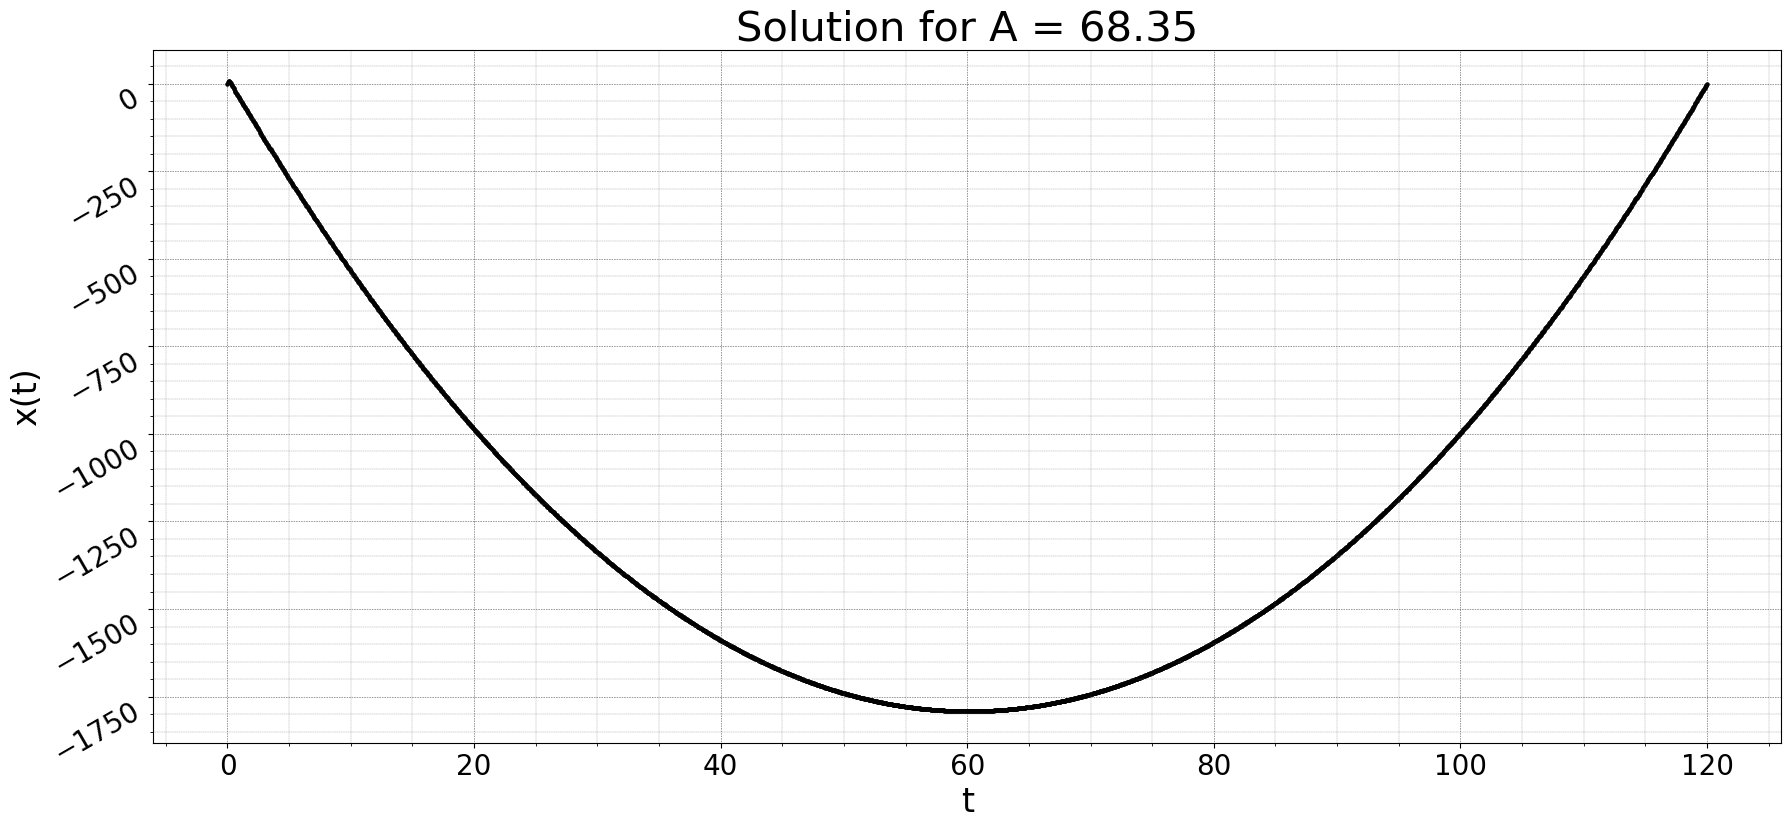

In [12]:
N = 2400
initial_approximations = [11.0, 19.0, 29.0, 68.8] # these values were chosen by precomputing
n_approx = len(initial_approximations)

T = np.empty(shape=(n_approx, N + 1))
X = np.empty(shape=(n_approx, N + 1))
A = np.empty(n_approx)

for i, initial in enumerate(initial_approximations):
    T[i], x, A[i] = shooting_method(F, solve_cauchy, t_1, x_1, t_2, x_2, N, initial)
    X[i] = x.transpose()[1] # we need only x, not its derivative

for t, x, a in zip(T, X, A):
    draw(t, x, a)

I also checked initial values for **fsolve** from 60 to 200 with step of 5. No new solution was found.

All in all, there are only 4 solutions with periods $T \in \{24, 40, 60, 120\}$.